# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#data.hist(figsize=(15.20))
display(data.head(20))
data.info()
data.isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

1. last_price - должен быть тип int 
2. first_day_exposition - object - должен быть тип datetime
3. ceiling_height - нулевые значения
4. floors_total - должен быть тип int, т.к. количество этажей - целое значение
5. is_apartment - должен быть тип bool
6. living_area - нулевые значения
7. kitchen_area - нулевые значения
8. balcony - нулевые значения
9. locality_name - нулевые значения
10. airports_nearest - нулевые значения
11. cityCenters_nearest - нулевые значения
12. parks_around3000 - тип должен быть int 
13. parks_nearest - нулевые значения
14. ponds_around3000 - тип должен быть int 
15. ponds_nearest - нулевые значения
16. days_exposition - тип должен быть int

### Предобработка данных

In [2]:
#Приводим к целым числам стоимость продажи квартир
data['last_price'] = data['last_price'].astype('int')
#Переводим дату публикации к типу даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#Заполняем пропуски в высоте потолков мдеианой, чтобы выборка не ушла
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
#Исключаем записи, где отсутствует локация и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
#Приводим этажность к целым числам
data['floors_total'] = data['floors_total'].astype('int')
#Заменяем пропушенные значения на нет
data['is_apartment'] = data['is_apartment'].fillna(False)
#Заполняем пропуски с втолбцах на 0, приводим к целочисленному типу
data['balcony'] = data['balcony'].fillna(value=0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype('int')
data['days_exposition'] = data['days_exposition'].fillna(9999).astype('int')
#Заполняем пропуски в жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)


#Удаляем неявные дубликаты в географических названиях
data['locality_name'] =  data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городского типа','')
data['locality_name'].value_counts()

#Смотрим количество пропусков
display(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

In [3]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#Устанавливаем тип этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

#Переводим расстояние до центра города в км
data['city_centre'] = data['cityCenters_nearest']/1000
data['city_centre'] = data['city_centre'].round(0)

display(data.head())



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,floor_type,city_centre
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,9999,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0,NaN,81,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2,574.0,558,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,84.0,3,234.0,424,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121,100000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

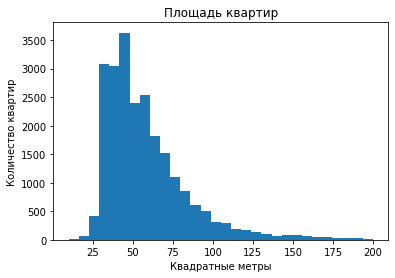

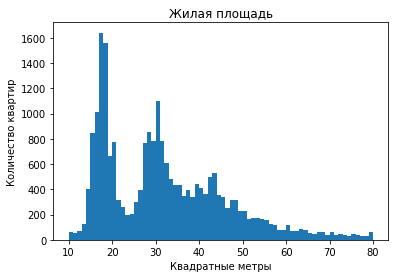

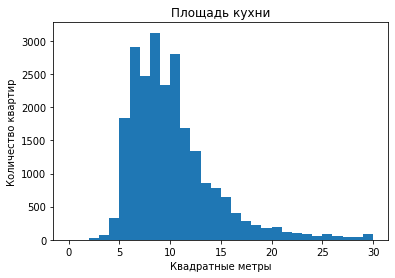

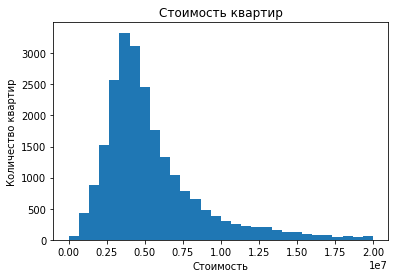

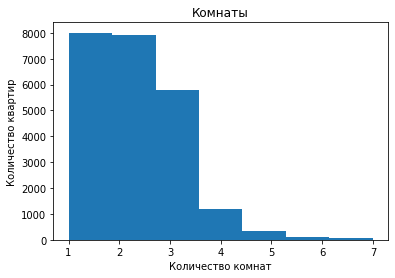

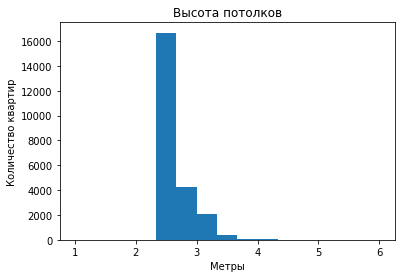

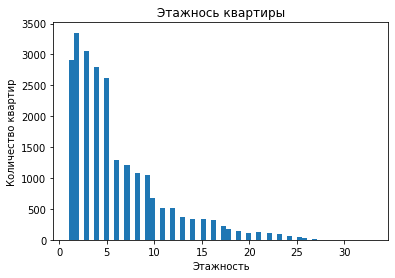

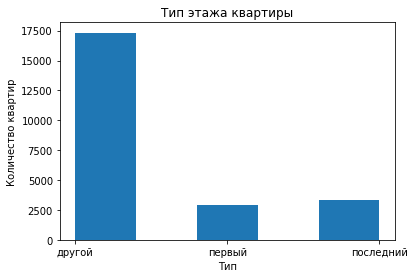

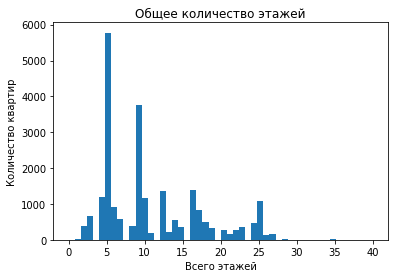

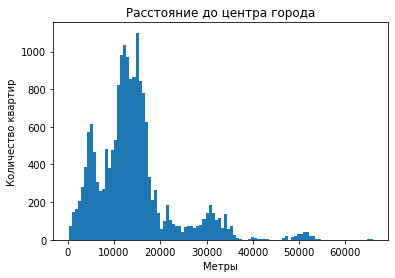

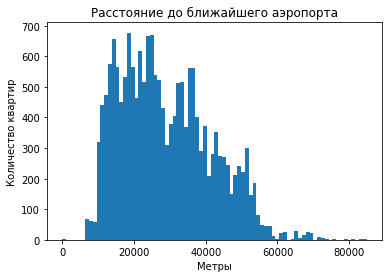

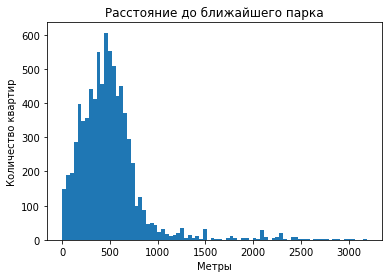

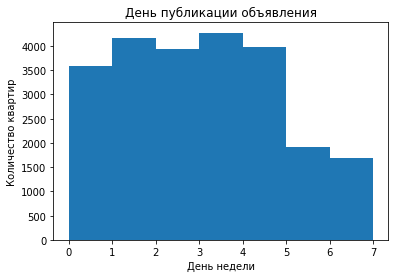

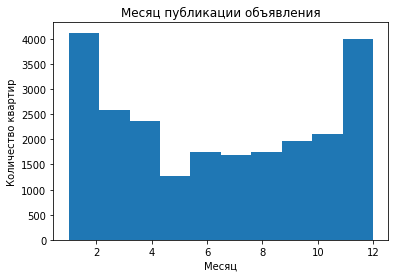

In [4]:
# Работаем с площадью
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с жилой площадью
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с площадью кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
# Работаем со стоимостью
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с комнатами
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с потолками
plt.hist(data['ceiling_height'], bins=15, range =(1,6))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с этажом квартиры
plt.hist(data['floor'], bins=60)
plt.title('Этажнось квартиры')
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с типом этажа квартиры
plt.hist(data['floor_type'], bins=5)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с общим количеством этажей
plt.hist(data['floors_total'], bins=50, range=(0,40))
plt.title('Общее количество этажей')
plt.xlabel('Всего этажей')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с расстоянием до центра города
plt.hist(data['cityCenters_nearest'], bins=100)
plt.title('Расстояние до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с расстоянием до аэропорта
plt.hist(data['airports_nearest'], bins=80)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с расстоянием до парка
plt.hist(data['parks_nearest'], bins=80)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с днём публикации объявления
plt.hist(data['weekday'], bins=7,range=(0,7))
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()
# Работаем с месяцем публикации объявления
plt.hist(data['month'], range=(1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Выводы.
Площадь: Большинство квартир - от 25 до 100 квадратных метров, больше площадь практически не встречается. В подборке есть выбросы с площадью более 200 квадратных метров.
Жилая площадь: Большая часть выборки располагается от 15 до 45 кв.м. 
Площадь кухни: Большая часть выборки находится от 5 до 15 кв.м.
Стоимость: В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало.
Комнаты: В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно. Возможно, это отдельный дом или совмещённые квартиры.
Высота потолков: Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно.
Этажность квартиры: Большая часть квартир продатёся с по 9 этажи. 
Тип этажа: На первом и последнем этажах квартир значительно меньше, чем на других.
Общее количество этажей: Много 5-ти и 9-ти этажных зданий.Реже встречаются 16 этажные здания.  
Расстояние до центра: есть квартиры около 5км, большинство находится в диапазоне от 10 до 20км.
Расстояние до аэропорта: Большинство квартир находится от 20 до 40 км от ближайшего аэропорта.
Расстояние до парка: Пик находится на отметке 500м. Почти вся выборка находится в диапазоне до 1км.
День публикации: в выходные объявлений публикуют значительно меньше.
Месяц публикации: Зимние месяци самые популярные для продажи квартир, летом у риэлторов не сезон.

Время продажи (медиана): 95
Время продажи (среднее): 181


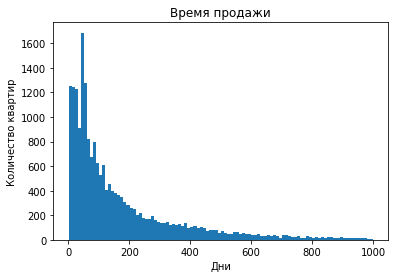

<Figure size 720x504 with 0 Axes>

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [5]:
# Работаем с днями продаж квартиры
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()))
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()))
plt.hist(data['days_exposition'], bins=100, range=(1,1000))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.figure(figsize=(10,7))
plt.show()
data.query('days_exposition != 9999')['days_exposition'].describe()

Вывод.
Медианное время продажи - 95 дней. Среднее время продажи - 181 день.
В основном квартиры продаются за срок 90-100 дней. Огромное число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

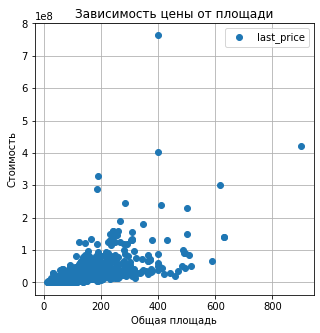

,last_price,total_area
last_price,1.000000,0.739123
total_area,0.739123,1.000000


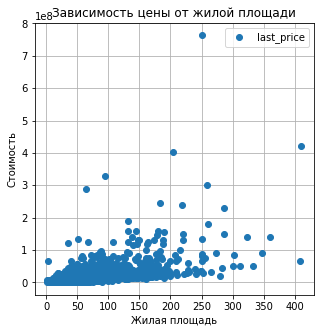

,last_price,living_area
last_price,1.000000,0.626853
living_area,0.626853,1.000000


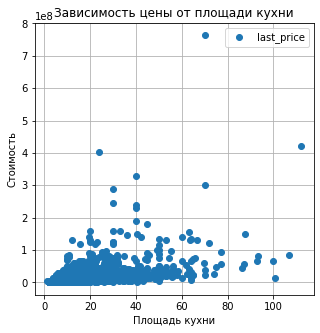

,kitchen_area,last_price
kitchen_area,1.000000,0.308049
last_price,0.308049,1.000000


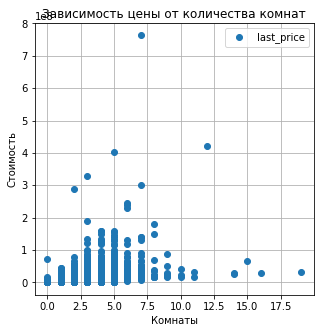

,last_price,rooms
last_price,1.000000,0.442934
rooms,0.442934,1.000000


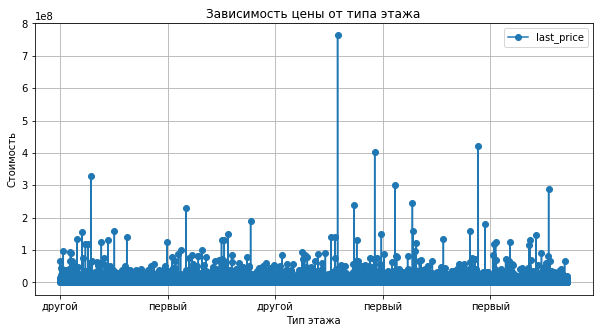

,last_price
last_price,1.0


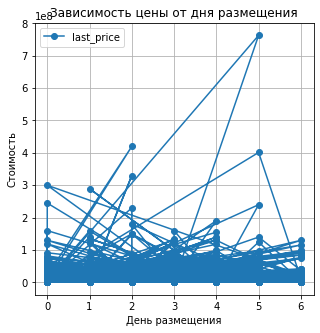

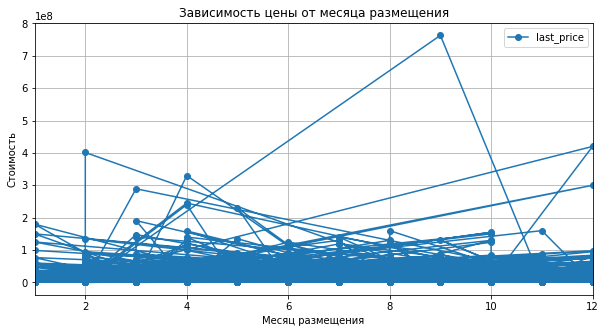

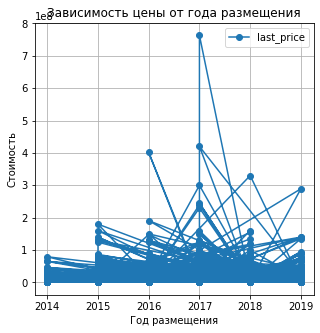

In [6]:
# Зависимость цены от площади
(
    data.plot(x='total_area', y='last_price',title ='Зависимость цены от площади', xlabel = 'Общая площадь',
          ylabel = 'Стоимость',grid=True, style='o',figsize=(5,5))
)
plt.show()
display(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())
# Зависимость цены от жилой площади 
(
    data.plot(x='living_area', y='last_price',title ='Зависимость цены от жилой площади', xlabel = 'Жилая площадь',
          ylabel = 'Стоимость',grid=True, style='o',figsize=(5,5))
)
plt.show()
display(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr())
# Зависимость цены от площади кухни
(
    data.plot(x='kitchen_area', y='last_price',title ='Зависимость цены от площади кухни', xlabel = 'Площадь кухни',
          ylabel = 'Стоимость',grid=True, style='o',figsize=(5,5))
)
plt.show()
display(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr())
# Зависимость цены от количества комнат
(
    data.plot(x='rooms', y='last_price',title ='Зависимость цены от количества комнат', xlabel = 'Комнаты',
          ylabel = 'Стоимость',grid=True, style='o', figsize=(5, 5))
)
plt.show()
display(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr())
# Зависимость цены от этажа
(
    data.plot(x='floor_type', y='last_price',title ='Зависимость цены от типа этажа', xlabel = 'Тип этажа',
          ylabel = 'Стоимость',grid=True, style='o-', figsize=(10, 5))
)
plt.show()
display(data.pivot_table(index='floor', values=['floor_type', 'last_price']).corr())
# Зависимость от дня размещения
(
    data.plot(x='weekday', y='last_price',title ='Зависимость цены от дня размещения', xlabel = 'День размещения',
          ylabel = 'Стоимость', grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.plot(x='month', y='last_price',title ='Зависимость цены от месяца размещения', xlabel = 'Месяц размещения',
          ylabel = 'Стоимость',grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    data.plot(x='year', y='last_price',title ='Зависимость цены от года размещения', xlabel = 'Год размещения',
          ylabel = 'Стоимость',grid=True, style='o-', figsize=(5, 5))
)
plt.show()


Вывод.
Чем больше площадь, тем выше стоимость, причём с довольно сильной зависимостью. Жилая площадь также влияет на стоимость, но не с такой сильной зависимостью, как общая площадь. Площадь кухни также влияет на стоимость квартиры, но зависимость очень несильная.
Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. 

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Квартиры со средних этажей дороже, но самые дорогие квартиры с последнего этажа.

День недели: дороже всего квартиры, опубликованные в пятницу и среду, дешевле всего - в субботу и понедельник.
Месяц: сентбярь, нобярь декабрь  и январь самые дорогие месяцы для продажи, самые дешевые - март, июнь, август.
Год: квартиры очень сильно с 15 по 18. В 2019 году цены снова стали повышаться.

,sm_price
locality_name,
санкт-петербург,114868.433902
пушкин,103125.373984
деревня кудрово,92473.086957
поселок парголово,90175.489297
поселок мурино,85629.110507
поселок шушары,78550.883827
колпино,75424.150888
гатчина,68745.693811
всеволожск,68654.007538


<AxesSubplot:title={'center':'Стоимость квадратного метра'}, xlabel='Населённый пункт', ylabel='Стоимость'>

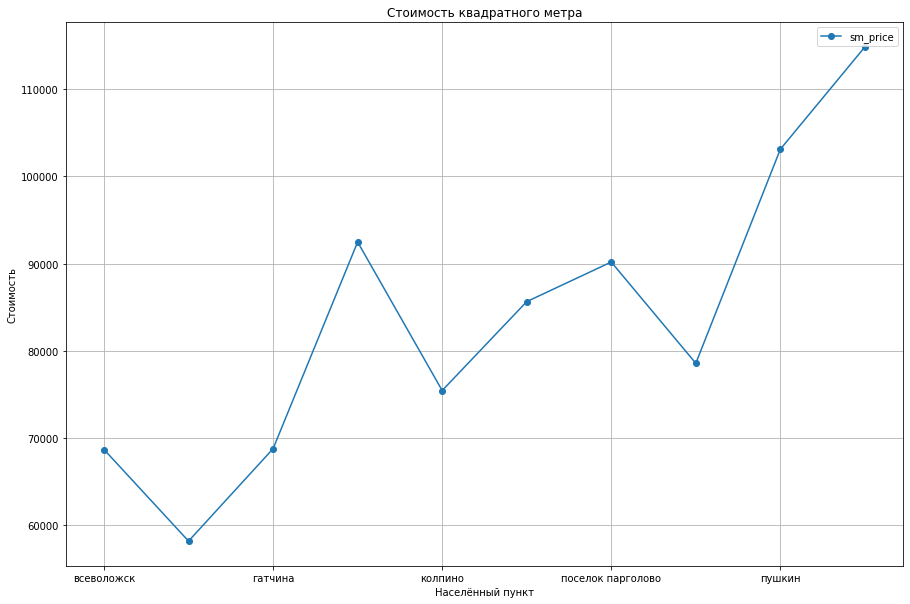

In [7]:
list1 = data['locality_name'].value_counts().head(10)
local_sm_price = data.query('locality_name in @list1.index').pivot_table(values='sm_price', index ='locality_name', aggfunc='mean')
display(local_sm_price.sort_values('sm_price', ascending=False))
local_sm_price.plot(title ='Стоимость квадратного метра', xlabel = 'Населённый пункт',
          ylabel = 'Стоимость',grid=True, style='o-', figsize=(15, 10))

Вывод. 
Наибольшая средняя стоимость кв.м.в Санкт-Петербурге. Затем идут все районы, примыкающие к этому городу. Наименьшая стоимость в городах, удалённых от Санкт-Петербурга.

<AxesSubplot:xlabel='city_centre'>

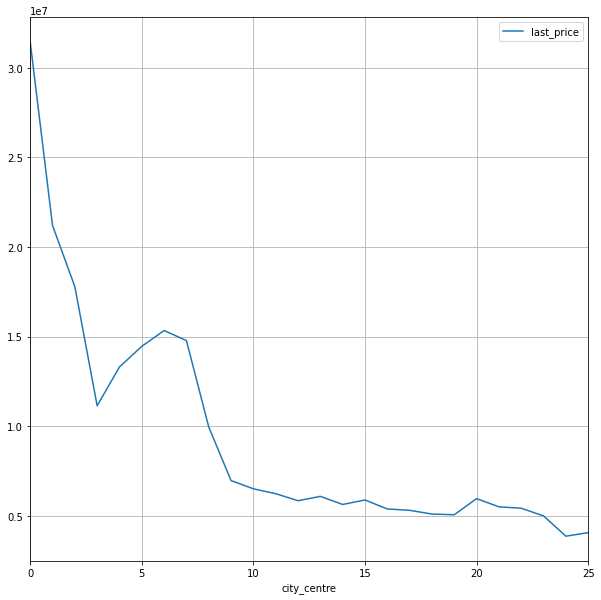

In [8]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='city_centre', values='last_price',aggfunc='mean')
    .plot(grid=True, figsize=(10,10),xlim=(0,25))
)

Вывод. 
Центральная зона это до 8 км, здесь цена максимальная, далее цена резко  снижается.

### Общий вывод

Срок продажи квартиры
Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Полагаю,встречаются дорогие квартиры с малым числом комнат, видимо комнаты больше.
Первый этаж значительно дешевле остальных вариантов. Стоимость квартиры на последенм этаже самая высокая.

Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141

